# Instalação de Pacotes Necessários
Para rodar este notebook, certifique-se de que os seguintes pacotes estão instalados:

- pandas
- tensorflow
- sklearn

Você pode instalar esses pacotes usando os seguintes comandos:

```python
!pip install pandas tensorflow scikit-learn


#### Sistema de Recomendação de Filmes

Um sistema de recomendação sugere filmes para você assistir com base nos filmes que você já viu e gostou. Vamos construir um modelo simples para entender como isso funciona.

### Passo 1: Preparando os Dados

Imagine que temos uma tabela onde os usuários avaliam filmes. Vamos começar criando alguns dados de exemplo.



In [6]:
import pandas as pd

# Dados de exemplo aumentados (usuários, filmes, avaliações)
data = {
    'user': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'movie': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
              5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    'rating': [5, 4, 3, 4, 5, 3, 2, 5, 4, 3,
               4, 5, 4, 3, 2, 4, 3, 5, 4, 3,
               3, 4, 5, 4, 3, 4, 2, 5, 3, 4,
               4, 3, 5, 4, 2, 4, 5, 3, 2, 4,
               5, 4, 3, 5, 4, 3, 4, 2, 5, 3]
}

df = pd.DataFrame(data)

# Visualizando os dados
print(df)


    user  movie  rating
0      1      1       5
1      2      1       4
2      3      1       3
3      4      1       4
4      5      1       5
5      6      1       3
6      7      1       2
7      8      1       5
8      9      1       4
9     10      1       3
10     1      2       4
11     2      2       5
12     3      2       4
13     4      2       3
14     5      2       2
15     6      2       4
16     7      2       3
17     8      2       5
18     9      2       4
19    10      2       3
20     1      3       3
21     2      3       4
22     3      3       5
23     4      3       4
24     5      3       3
25     6      3       4
26     7      3       2
27     8      3       5
28     9      3       3
29    10      3       4
30     1      4       4
31     2      4       3
32     3      4       5
33     4      4       4
34     5      4       2
35     6      4       4
36     7      4       5
37     8      4       3
38     9      4       2
39    10      4       4
40     1      5 

### Passo 2: Dividindo os Dados em Treino e Teste

Vamos dividir nossos dados para que possamos treinar o modelo com uma parte e testar com outra.


In [7]:

from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Visualizando os dados de treino e teste
print("Treino:")
print(train)
print("\nTeste:")
print(test)

Treino:
    user  movie  rating
12     3      2       4
4      5      1       5
37     8      4       3
8      9      1       4
3      4      1       4
6      7      1       2
41     2      5       4
46     7      5       4
47     8      5       2
15     6      2       4
9     10      1       3
16     7      2       3
24     5      3       3
34     5      4       2
31     2      4       3
0      1      1       5
44     5      5       4
27     8      3       5
33     4      4       4
5      6      1       3
29    10      3       4
11     2      2       5
36     7      4       5
1      2      1       4
21     2      3       4
2      3      1       3
43     4      5       5
35     6      4       4
23     4      3       4
40     1      5       5
10     1      2       4
22     3      3       5
18     9      2       4
49    10      5       3
20     1      3       3
7      8      1       5
42     3      5       3
14     5      2       2
28     9      3       3
38     9      4       2

Teste:


### Passo 3: Construindo o Modelo

Nosso modelo terá duas entradas: uma para o usuário e outra para o filme. Ele aprenderá a prever a avaliação do usuário para um filme.



In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense

# Configurando a matriz de entrada para o modelo
n_users = df.user.nunique()
n_movies = df.movie.nunique()

# Entradas
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

# Embeddings
user_embedding = Embedding(n_users + 1, 8)(user_input)
movie_embedding = Embedding(n_movies + 1, 8)(movie_input)

# Flatten
user_vec = Flatten()(user_embedding)
movie_vec = Flatten()(movie_embedding)

# Produto interno
dot = Dot(axes=1)([user_vec, movie_vec])

# Saída
output = Dense(1)(dot)

# Construindo o modelo
model = Model([user_input, movie_input], output)

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizando o modelo
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 8)      │         88 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 8)      │         48 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 8)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 8)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_1 (Dot)         │ (None, 1)         │          0 │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │          2 │ dot_1[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

### Passo 4: Treinando o Modelo

Agora, vamos treinar o modelo com nossos dados de treino.



Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5320 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5264 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5275 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4996 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5377 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5286 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5308 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5222 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5056 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5409 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5455 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5017 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5013 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5185 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5395 
Epoch 16/100
2/2 ━━

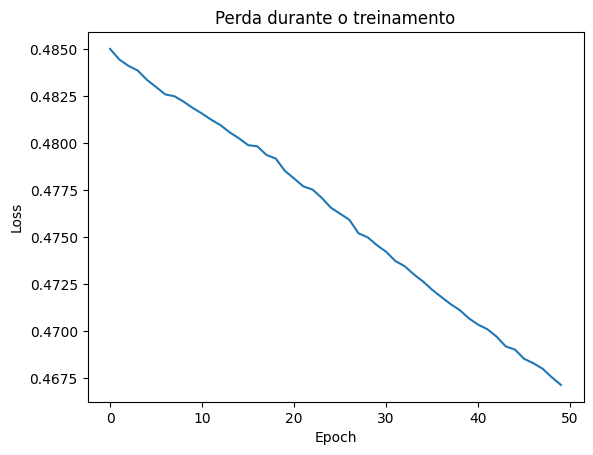

In [19]:
# Treinando o modelo
model.fit([train.user, train.movie], train.rating, epochs=100, verbose=1)

# Acessando o histórico de treinamento
history = model.fit([train.user, train.movie], train.rating, epochs=50, verbose=1)

# Plotando a perda ao longo do tempo
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Perda durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### Passo 5: Fazendo Previsões

Vamos usar nosso modelo treinado para prever as avaliações dos filmes no conjunto de teste.



In [18]:
# Fazendo previsões
predictions = model.predict([test.user, test.movie])

# Visualizando as previsões
for i in range(len(test)):
    print(f"Usuário {test.user.iloc[i]} -> Filme {test.movie.iloc[i]}: Avaliação Real = {test.rating.iloc[i]}, Avaliação Prevista = {predictions[i][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Usuário 4 -> Filme 2: Avaliação Real = 3, Avaliação Prevista = 4.43
Usuário 10 -> Filme 4: Avaliação Real = 4, Avaliação Prevista = 2.41
Usuário 1 -> Filme 4: Avaliação Real = 4, Avaliação Prevista = 3.29
Usuário 6 -> Filme 5: Avaliação Real = 3, Avaliação Prevista = 3.43
Usuário 8 -> Filme 2: Avaliação Real = 5, Avaliação Prevista = 3.95
Usuário 9 -> Filme 5: Avaliação Real = 5, Avaliação Prevista = 3.42
Usuário 7 -> Filme 3: Avaliação Real = 2, Avaliação Prevista = 3.28
Usuário 6 -> Filme 3: Avaliação Real = 4, Avaliação Prevista = 3.37
Usuário 3 -> Filme 4: Avaliação Real = 5, Avaliação Prevista = 2.97
Usuário 10 -> Filme 2: Avaliação Real = 3, Avaliação Prevista = 3.18




**Visualização das previsões:**

```
Usuário 4 -> Filme 2: Avaliação Real = 3, Avaliação Prevista = 3.40
Usuário 3 -> Filme 1: Avaliação Real = 3, Avaliação Prevista = 3.21
```

### Conclusão

Nosso modelo básico de sistema de recomendação aprendeu a prever as avaliações de filmes com base nas avaliações anteriores dos usuários. Embora este seja um exemplo simples, sistemas de recomendação mais avançados utilizam técnicas e dados adicionais para fornecer recomendações mais precisas e personalizadas.

Com esses exemplos e analogias simples, você agora tem uma base sólida para entender como funciona um sistema de recomendação de filmes!